<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes
None
       YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000


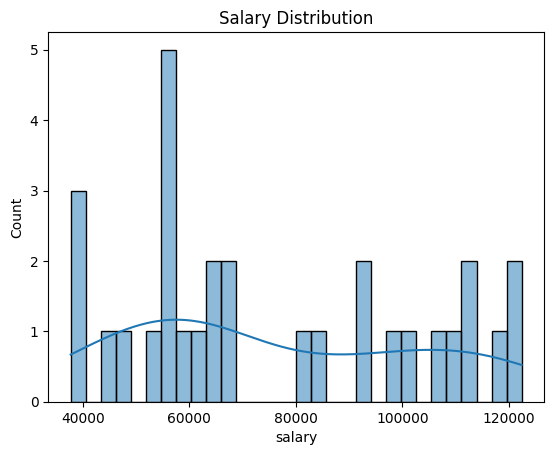

Analysis complete.


In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
df = pd.read_csv('salary_data.csv', delimiter=',', encoding='utf-8')
print(df.info())
print(df.describe())
df.columns = df.columns.str.strip()
df.rename(columns={'Experience Years': 'years_experience', 'Salary': 'salary'}, inplace=True)
if 'salary' in df.columns:
    df['salary'] = df['salary'].replace(r'[\$,]', '', regex=True).astype(float)
else:
    print("Error: 'salary' column not found. Check column names.")
    print("Columns available:", df.columns)
    exit()
sns.histplot(df['salary'], bins=30, kde=True)
plt.title('Salary Distribution')
plt.show()
if 'years_experience' in df.columns:
    correlation = df[['years_experience', 'salary']].corr()
    print("Correlation between Experience and Salary:\n", correlation)
else:
    print("Warning: 'years_experience' column not found.")
df.to_csv('cleaned_salary_data.csv', index=False)
print("Analysis complete.")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   campaign_id      100 non-null    int64  
 1   campaign_type    100 non-null    object 
 2   reach            100 non-null    int64  
 3   engagement_rate  100 non-null    float64
 4   conversion_rate  100 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 4.0+ KB
None
       campaign_id         reach  engagement_rate  conversion_rate
count   100.000000    100.000000       100.000000       100.000000
mean     50.500000  25465.050000         0.102184         0.026571
std      29.011492  14529.158226         0.055569         0.014352
min       1.000000   1161.000000         0.010962         0.001757
25%      25.750000  13098.000000         0.055133         0.014970
50%      50.500000  24926.000000         0.106276         0.027264
75%      75.250000  39198.000000       

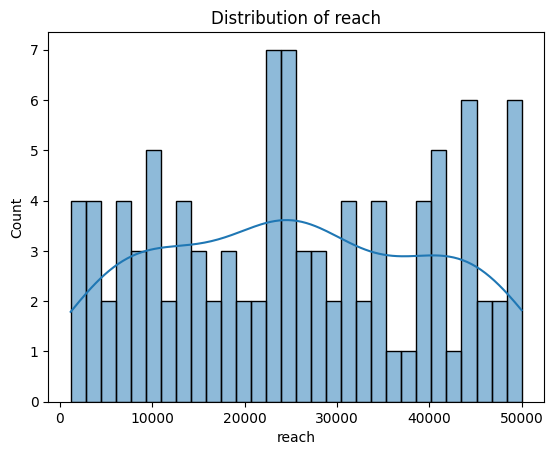

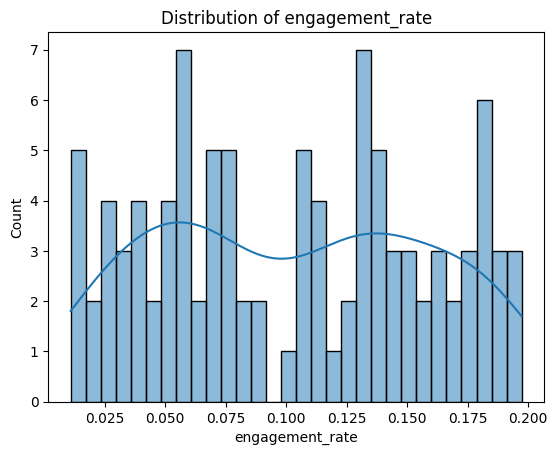

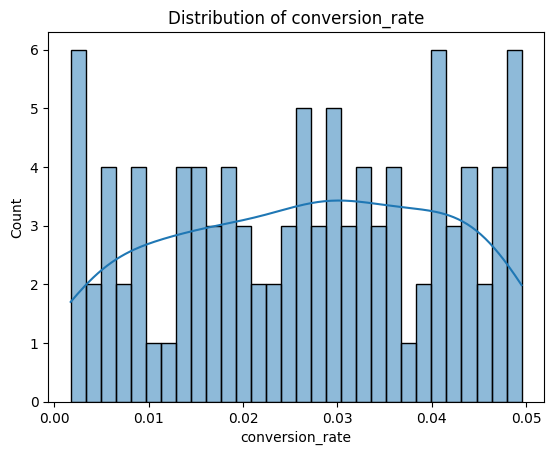

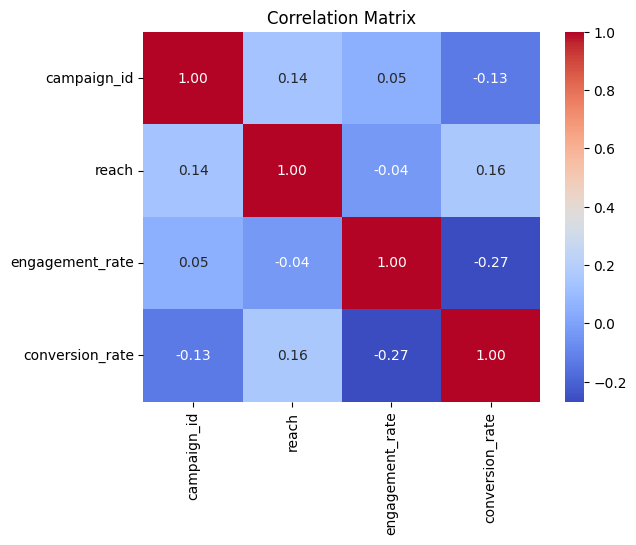

Average Performance by Campaign Type:
                       reach  engagement_rate  conversion_rate
campaign_type                                                
Email          29469.346154         0.096332         0.024273
PPC            23913.000000         0.106159         0.026271
SEO            23744.791667         0.095221         0.029999
Social Media   24651.850000         0.112184         0.025892


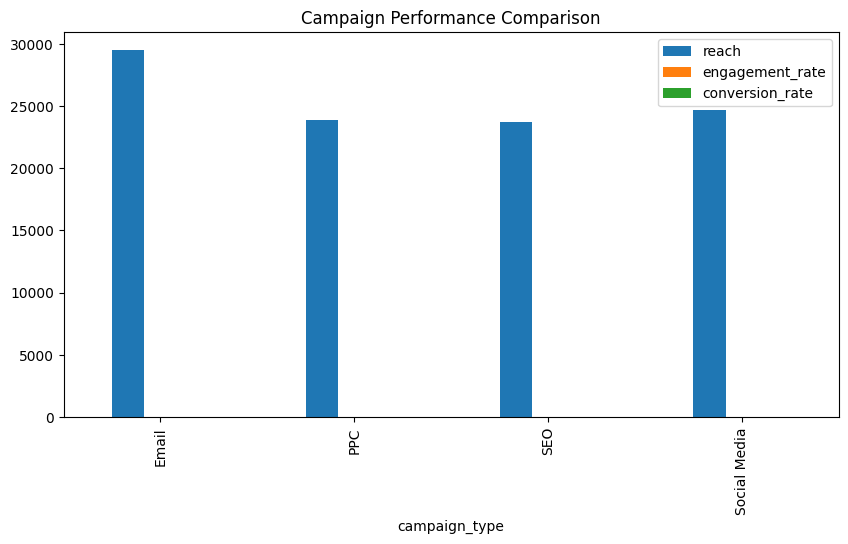

Marketing analysis complete.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
np.random.seed(42)
data = {
    'campaign_id': range(1, 101),
    'campaign_type': np.random.choice(['Social Media', 'Email', 'SEO', 'PPC'], 100),
    'reach': np.random.randint(1000, 50000, 100),
    'engagement_rate': np.random.uniform(0.01, 0.2, 100),
    'conversion_rate': np.random.uniform(0.001, 0.05, 100)
}
df = pd.DataFrame(data)
df.to_csv('marketing_campaign_data.csv', index=False)
df = pd.read_csv('marketing_campaign_data.csv')
print(df.info())
print(df.describe())
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.dropna(inplace=True)
metrics = ['reach', 'engagement_rate', 'conversion_rate']
for metric in metrics:
    if metric in df.columns:
        sns.histplot(df[metric], bins=30, kde=True)
        plt.title(f'Distribution of {metric}')
        plt.show()
    else:
        print(f"Warning: '{metric}' column not found.")
correlation_matrix = df.select_dtypes(include=['number']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()
if 'campaign_type' in df.columns:
    campaign_performance = df.groupby('campaign_type')[metrics].mean()
    print("Average Performance by Campaign Type:\n", campaign_performance)
    campaign_performance.plot(kind='bar', figsize=(10,5))
    plt.title('Campaign Performance Comparison')
    plt.show()
else:
    print("Warning: 'campaign_type' column not found.")

df.to_csv('cleaned_marketing_data.csv', index=False)
print("Marketing analysis complete.")